In [2]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Importing the Dataset
dataset = pd.read_csv("sonar.all-data")
x = dataset.iloc[:, 0:60 ].values
y = dataset.iloc[:, 60].values


# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


# Scaling the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)



# Decision Tree CLassification
# Fitting the decision tree classification to the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Checking the accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7307692307692307


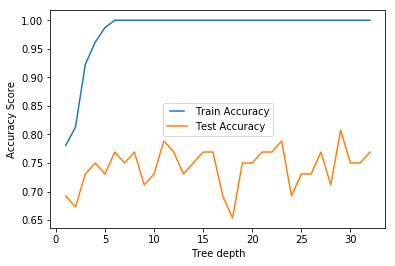

In [3]:
# Tuning Max Depth

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    train_results.append(metrics.accuracy_score(y_train, train_pred))
    y_pred = dt.predict(x_test)
    test_results.append(metrics.accuracy_score(y_test, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, label="Train Accuracy")
line2, = plt.plot(max_depths, test_results, label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy Score')
plt.xlabel('Tree depth')
plt.show()

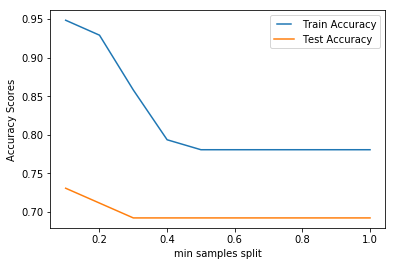

In [4]:
# Tuning Min Samples Split

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split = min_samples_split)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    train_results.append(metrics.accuracy_score(y_train, train_pred))
    y_pred = dt.predict(x_test)
    test_results.append(metrics.accuracy_score(y_test, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, label="Train Accuracy")
line2, = plt.plot(min_samples_splits, test_results, label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy Scores')
plt.xlabel('min samples split')
plt.show()


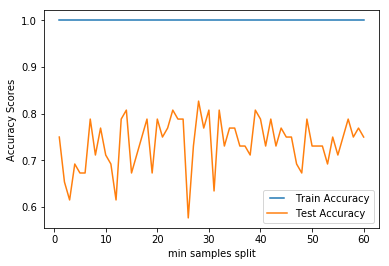

In [5]:
# Tuning Max features

max_features = list(range(1,dataset.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features = max_feature)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    train_results.append(metrics.accuracy_score(y_train, train_pred))
    y_pred = dt.predict(x_test)
    test_results.append(metrics.accuracy_score(y_test, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, label="Train Accuracy")
line2, = plt.plot(max_features, test_results, label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy Scores')
plt.xlabel('min samples split')
plt.show()


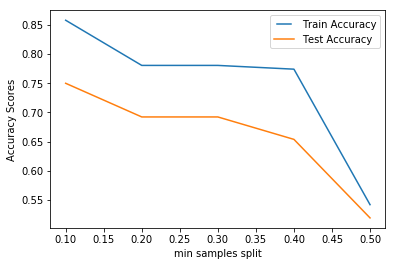

In [6]:
# Tuning Min Samples Leaf

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    train_results.append(metrics.accuracy_score(y_train, train_pred))
    y_pred = dt.predict(x_test)
    test_results.append(metrics.accuracy_score(y_test, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, label="Train Accuracy")
line2, = plt.plot(min_samples_leafs, test_results, label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy Scores')
plt.xlabel('min samples split')
plt.show()


In [8]:
# Hyperparameter Tuning in Decision Dree using Grid Search

from sklearn import tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':max_depths, 'max_features':max_features}
clf = GridSearchCV(tree.DecisionTreeClassifier( random_state= 0), parameters, n_jobs=4, cv = 5)
clf.fit(X=x_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8258064516129032 {'max_depth': 4.0, 'max_features': 55}


/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [9]:
# Random Forest Classification to the training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(x_train, y_train)

# Predicting the test set results
y_pred = rf.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.7884615384615384
[[24  3]
 [ 8 17]]


In [ ]:
# Hyperparameter Tuning in Random Forest
parameters = {
    'bootstrap': [True,False],
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1000]
}
clf = GridSearchCV(estimator = rf, param_grid = parameters, n_jobs=4, cv = 5)
clf.fit(X=x_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

In [12]:
# Support Vector Classification
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [13]:
# Hyperparameter Tuning in SVC
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

clf = GridSearchCV(estimator = svc, param_grid = parameters, n_jobs=4, cv = 5)
clf.fit(X=x_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.7870967741935484 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
